In [312]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Lecture: https://github.com/gSchool/DSI_Lectures/blob/master/dimensionality-reduction/brandon_ma/pca.ipynb

Assignment: https://github.com/GalvanizeDataScience/pca

In [67]:
digits = load_digits()

In [3]:
print(digits.data.shape)

(1797, 64)


In [21]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [9]:
_ = plt.gray()

<Figure size 432x288 with 0 Axes>

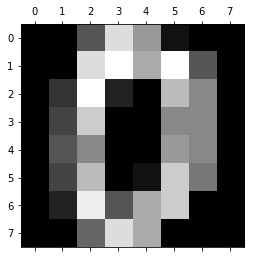

In [10]:
_ = plt.matshow(digits.images[0])
_ = plt.set_title(digits.)

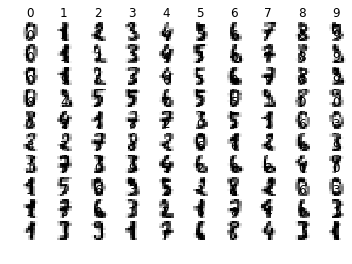

In [57]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:100]):
    plt.subplot(10, 10, index + 1)
    plt.axis('off')dd
    plt.imshow(image, cmap=plt.cm.gray_r,  interpolation='nearest')
    plt.title('{}'.format(label))

#### PCA on subset
For simplicity we will look at the first 6 digits.
1. Load the first 6 classes of the MNIST digits dataset using [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). This is all the datapoints for the digits 0-5. You should have 1083 datapoints.


In [91]:
digits = load_digits(n_class=6)

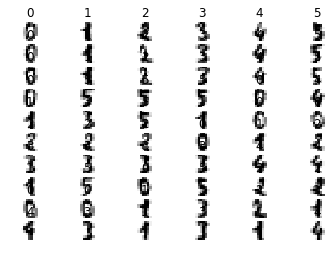

In [62]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:60]):
    plt.subplot(10, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r,  interpolation='nearest')
    plt.title('{}'.format(label))

In [64]:
len(digits.target)

1083

2. For PCA, it is important that our data is normalized/scaled.  Using scikit-learn's [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), scale the digits dataset.

In [68]:
scaler = StandardScaler()

In [71]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [251]:
# scale our images using standardscaler 
# PCA must be scaled
X = np.array([StandardScaler().fit_transform(img) for img in digits.images])

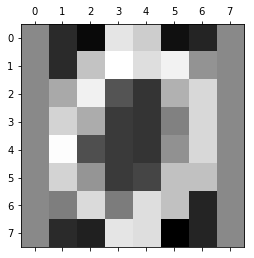

In [252]:
plt.matshow(X[0])

3. Now that we have properly scaled images, we can apply the PCA transformation.  Using scikit-learn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), project our digits dataset into lower dimensional space.  First try 10 components.

In [266]:
# 2d image
# X = np.vstack(X)
# print(X[0].shape)

# Vectorized image
X_flat = np.array([img.flatten() for img in X])
print(X_flat.shape)

(1083, 64)


In [301]:
pca = PCA(n_components=64)

In [302]:
X_fit = pca.fit(X_flat)

4. Due to the loss of information in projecting data into lower dimensional space, our transformation is never perfect. One way we can determine how well it worked is to plot the amount of explained variance.  Using the function snippet below, plot the amount of explained variance of each of the principal components.

In [303]:
def scree_plot(ax, pca, n_components_to_plot=40, title=None):
    """Make a scree plot showing the variance explained (i.e. variance
    of the projections) for the principal components in a fit sklearn
    PCA object.

    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.

    pca: sklearn.decomposition.PCA object.
      A fit PCA object.

    n_components_to_plot: int
      The number of principal components to display in the scree plot.

    title: str
      A title for the scree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
        (ind[i]+0.2, vals[i]+0.005), 
        va="bottom", 
        ha="center", 
        fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

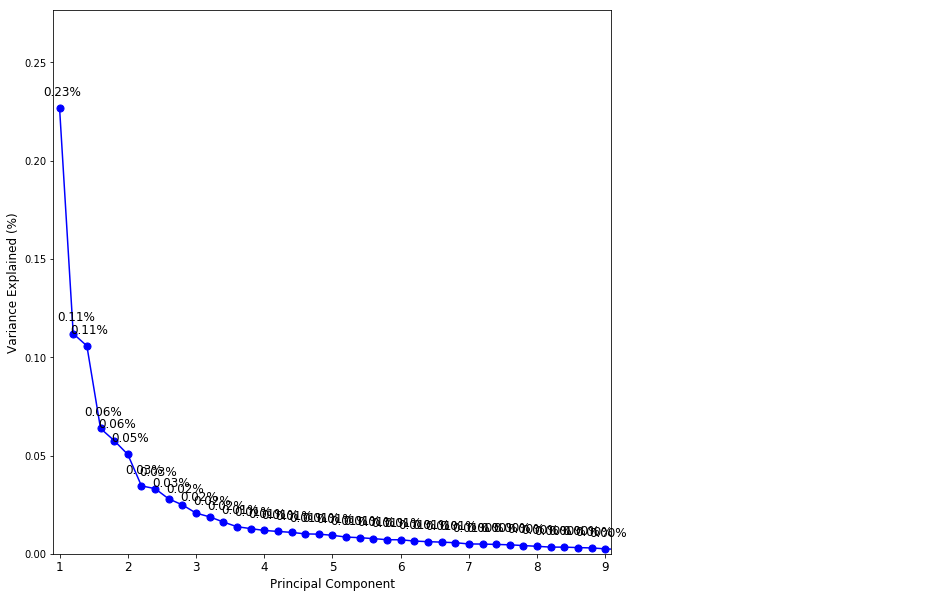

In [304]:
fig, ax = plt.subplots(1, figsize=(10,10))
scree_plot(ax, X_fit)

In [305]:
eigen_num = X_fit.components_[0].reshape(64,64)

ValueError: cannot reshape array of size 64 into shape (64,64)

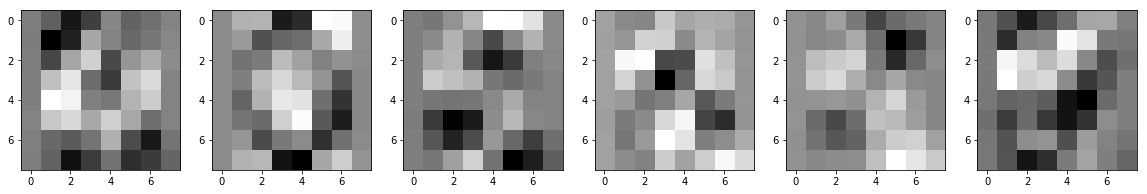

In [306]:
fig, ax = plt.subplots(1,6, figsize=(20,16))

for ax, i in zip(ax.flatten(), range(10)):
    eigen_num = X_fit.components_[i, :].reshape(8,8)
    ax.imshow(eigen_num)

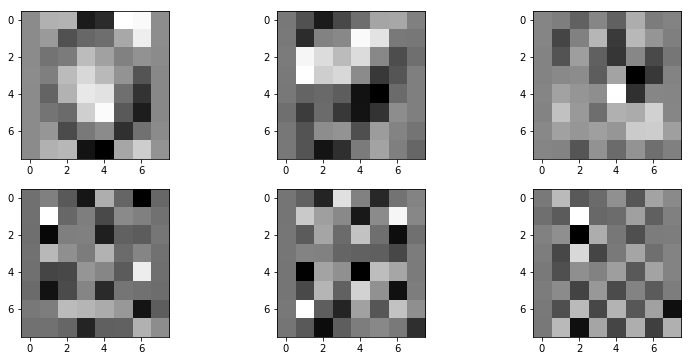

In [307]:
fig, axs = plt.subplots(2, 3, figsize=(13, 6))

for ax, i in zip(axs.flatten(), [1, 5, 10, 20, 25, 39]):
    eigen_num = X_fit.components_[i, :].reshape(8,8)
    ax.imshow(eigen_num)

In [329]:
def plot_mnist_embedding(ax, X, y, title=None):
    """Plot an embedding of the mnist dataset onto a plane.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    X: numpy.array, shape (n, 2)
      A two dimensional array containing the coordinates of the embedding.
      
    y: numpy.array
      The labels of the datapoints.  Should be digits.
      
    title: str
      A title for the plot.
    """
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 
                 str(y[i]), 
                 color=plt.cm.Set1(y[i] / 10.), 
                 fontdict={'weight': 'bold', 'size': 12})

    ax.set_xticks([]), 
    ax.set_yticks([])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([-0.1,1.1])

    if title is not None:
        ax.set_title(title, fontsize=16)

In [330]:
X = digits.images
y = digits.target

In [333]:
y

array([0, 1, 2, ..., 4, 4, 0])

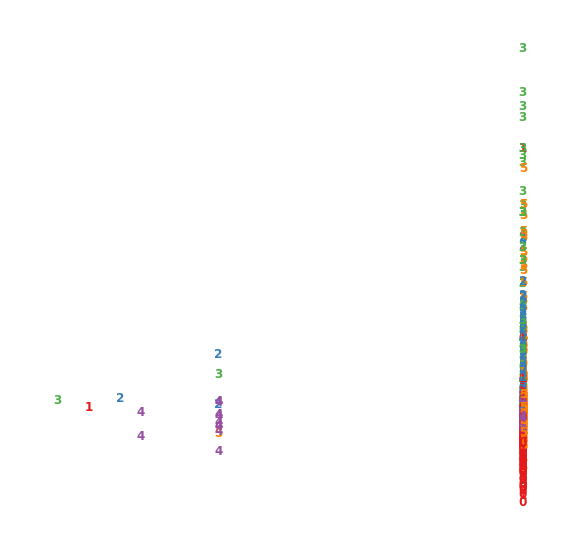

In [336]:
fig, ax = plt.subplots(1, figsize=(10,10))
plot_mnist_embedding(ax, X_flat, y)

#### Redundant Features


Additionally, PCA can be used to get rid of redundant features, and removes the issue of multicollinearity among the feature space used to regress the dependent variable.  Let's look at the car dataset and regress mpg.

1. (Data cleaning) Use pandas to load the car dataset into a dataframe

In [349]:
df = pd.read_csv('/home/asus/G_school_lectures/Week_7_Lectures/pca/data/cars.tsv', sep='\t')

In [350]:
df

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500
5,14.0 8 454.0 220.0 4354. 9...,chevrolet impala
6,14.0 8 440.0 215.0 4312. 8...,plymouth fury iii
7,14.0 8 455.0 225.0 4425. 10...,pontiac catalina
8,15.0 8 390.0 190.0 3850. 8...,amc ambassador dpl
9,15.0 8 383.0 170.0 3563. 10...,dodge challenger se
